## Sources

Cost of Living: https://wisevoter.com/state-rankings/cost-of-living-by-state/#cost-of-living-index

Descriptions of Jobs:
https://www.bls.gov/ooh/math/data-scientists.htm#tab-2
https://www.bls.gov/ooh/business-and-financial/market-research-analysts.htm#tab-2
https://www.bls.gov/ooh/math/operations-research-analysts.htm#tab-2
https://www.bls.gov/ooh/computer-and-information-technology/database-administrators.htm#tab-2

ZipRecruiter (Fill in Vermont and Virginia values of Data Scientist and Data Architect respectively)


In [1]:
#Loading BLS Data

import pandas as pd
bls = pd.read_excel(r"C:\Users\dcrai\source\repos\DATA608\Major Assignments\Story 4\bls_data.xlsx")

bls.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,18.5,28.94,43.25,21580,28030,38470,60190,89950,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,46.12,63.53,86.89,47680,66210,95940,132150,180730,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,65.83,90.64,#,50920,108470,136930,188530,#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,47.17,71.64,105.19,44530,65280,98120,149010,218800,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,...,*,*,*,17080,18130,20320,35730,57060,True,NaN


In [2]:
#Reducing Columns to only important ones
bls_col_reduce = bls[["AREA_TITLE","OCC_TITLE","A_MEAN"]]


#Filtering BLS Data for job roles of interest
careers = ['Data Scientists','Database Administrators','Database Architects','Operations Research Analysts','Market Research Analysts and Marketing Specialists']

bls_curated = bls_col_reduce[bls_col_reduce['OCC_TITLE'].isin(careers)]

bls_curated.columns = ['State','Occ_Title','Salary_Mean']

bls_curated.head()

,State,Occ_Title,Salary_Mean
51,Alabama,Market Research Analysts and Marketing Special...,63710
73,Alabama,Database Administrators,87090
74,Alabama,Database Architects,119590
83,Alabama,Operations Research Analysts,109160
85,Alabama,Data Scientists,91570


In [3]:
#Loading ML Engineer Data
ml_eng = pd.read_excel(r"C:\Users\dcrai\source\repos\DATA608\Major Assignments\Story 4\ML Engineer.xlsx")
ml_eng = ml_eng.assign(OCC_TITLE = "Machine Learning Engineer")

ml_eng.columns = ['State','Salary_Mean','Occ_Title']

In [4]:
master = pd.concat([bls_curated,ml_eng], ignore_index=True)
master = master.sort_values('State').reset_index(drop=True)

In [5]:
STAB = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode island': 'RI',
    'South carolina': 'SC',
    'South dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [6]:
master['STAB'] = master['State'].map(STAB)

In [7]:
#Loading Cost of Living
#https://wisevoter.com/state-rankings/cost-of-living-by-state/#cost-of-living-index

#import as a dataframe
cost_of_living = pd.read_excel(r"C:\Users\dcrai\source\repos\DATA608\Major Assignments\Story 4\Cost of Living.xlsx")
cost_of_living = cost_of_living[['State','Cost of Living Index']]
#use zip() to create a list of tuples by iterating element-wise, i.e. rows, across two objects
#pass the list of tuples to dict to create our mapping dictionary
col_dict = dict(zip(cost_of_living['State'], cost_of_living['Cost of Living Index']))

#map the dictionary to the table
master['Cost_of_Living']= master['State'].map(col_dict)

master.head(10)

,State,Occ_Title,Salary_Mean,STAB,Cost_of_Living
0,Alabama,Market Research Analysts and Marketing Special...,63710,AL,88.1
1,Alabama,Database Administrators,87090,AL,88.1
2,Alabama,Database Architects,119590,AL,88.1
3,Alabama,Operations Research Analysts,109160,AL,88.1
4,Alabama,Data Scientists,91570,AL,88.1
5,Alabama,Machine Learning Engineer,106372,AL,88.1
6,Alaska,Data Scientists,103810,AK,126.6
7,Alaska,Machine Learning Engineer,123316,AK,126.6
8,Alaska,Operations Research Analysts,86890,AK,126.6
9,Alaska,Database Administrators,92040,AK,126.6


In [8]:
#checking for null values. BLS uses '*' to indicate null value
master[master.apply(lambda row: row.astype(str).str.contains(r'\*', case=False).any(), axis=1)]

,State,Occ_Title,Salary_Mean,STAB,Cost_of_Living


In [9]:
#Converting all data types to appropriate
master['State'] = master['State'].astype(str)
master['Occ_Title'] = master['Occ_Title'].astype(str)
master['Salary_Mean'] = pd.to_numeric(master['Salary_Mean'])
master['STAB'] = master['STAB'].astype(str)
master['Cost_of_Living'] = pd.to_numeric(master['Cost_of_Living'])

In [10]:
import pandas as pd

# Assuming you have a DataFrame named 'master'
# Group the DataFrame by 'Occ_Title' and calculate the correlation with 'Cost_of_Living'
correlation_data = master.groupby('Occ_Title')[['Cost_of_Living','Salary_Mean']].corr()

In [11]:
correlation_data

Cost_of_Living  \
Occ_Title                                                                           
Data Scientists                                    Cost_of_Living        1.000000   
                                                   Salary_Mean           0.438682   
Database Administrators                            Cost_of_Living        1.000000   
                                                   Salary_Mean           0.489003   
Database Architects                                Cost_of_Living        1.000000   
                                                   Salary_Mean           0.317403   
Machine Learning Engineer                          Cost_of_Living        1.000000   
                                                   Salary_Mean           0.480918   
Market Research Analysts and Marketing Specialists Cost_of_Living        1.000000   
                                                   Salary_Mean           0.410648   
Operations Research Analysts                       Cost_of_Living        1.000000   
                                                   Salary_Mean           0.374615   

                                                                   Salary_Mean  
Occ_Title                                                                       
Data Scientists                                    Cost_of_Living     0.438682  
                                                   Salary_Mean        1.000000  
Database Administrators                            Cost_of_Living     0.489003  
                                                   Salary_Mean        1.000000  
Database Architects                                Cost_of_Living     0.317403  
                                                   Salary_Mean        1.000000  
Machine Learning Engineer                          Cost_of_Living     0.480918  
                                                   Salary_Mean        1.000000  
Market Research Analysts and Marketing Specialists Cost_of_Living     0.410648  
                                                   Salary_Mean        1.000000  
Operations Research Analysts                       Cost_of_Living     0.374615  
                                                   Salary_Mean        1.000000

In [12]:
correlation_data_condensed = correlation_data.iloc[1::2,0]
correlation_data_condensed
correlation_data_condensed = correlation_data_condensed.reset_index()
correlation_data_condensed
correlation_data_condensed = correlation_data_condensed.iloc[:,[0,2]]
correlation_data_condensed.columns = ['Occ_Title','Salary_CoL_Corr']
correlation_data_condensed

,Occ_Title,Salary_CoL_Corr
0,Data Scientists,0.438682
1,Database Administrators,0.489003
2,Database Architects,0.317403
3,Machine Learning Engineer,0.480918
4,Market Research Analysts and Marketing Special...,0.410648
5,Operations Research Analysts,0.374615


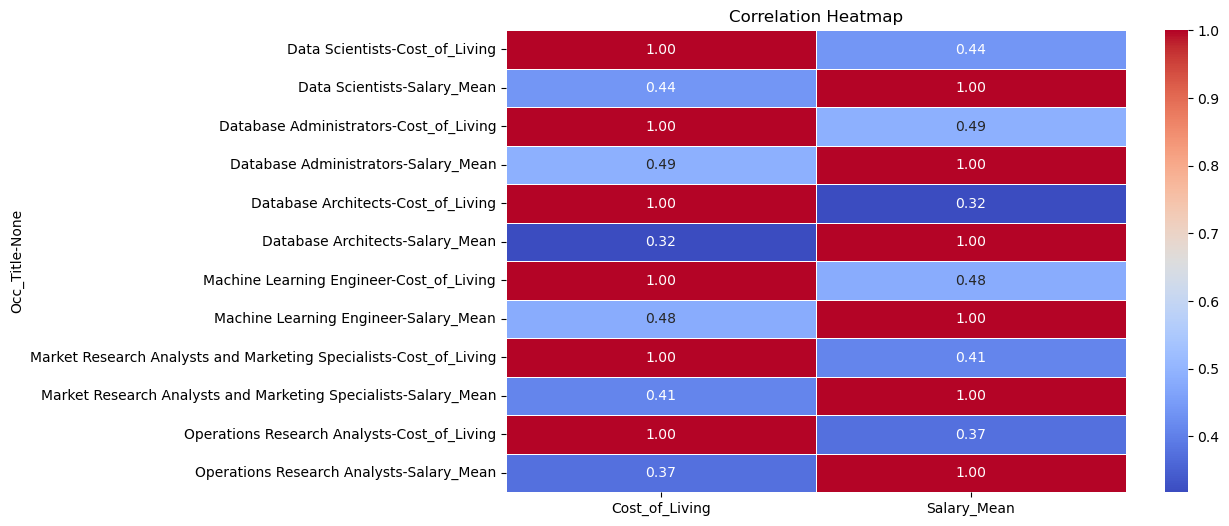

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


Your visualization(s) must show the most salient information (variation in average salary by role and by state).

Post generation enhancements to you generated visualization will be allowed (e.g. Addition of kickers and labels).

## To Do List

1. Show the top and bottom 5 states for each occupation
2. Show average highest salaries across all states
3. Histograms on 

-Choropleth of US States of top/bot 5 salaries for each role

Do the same states have the highest salaries across all occupations?


-Bar chart of average salaries for each occupation
-Histogram of Salaries for each occupation


3. Show states

In [14]:
#'Database Administrators','Database Architects',
#'Operations Research Analyst'
#'Market Research Analysts and Marketing Specialists'
data_sc = master[master['Occ_Title'] == 'Data Scientists']
db_adm = master[master['Occ_Title'] == 'Database Administrators']
db_arc = master[master['Occ_Title'] == 'Database Architects']
op_rs = master[master['Occ_Title'] == 'Operations Research Analysts']
market_rs = master[master['Occ_Title'] == 'Market Research Analysts and Marketing Specialists']
ml_eng = master[master['Occ_Title'] =="Machine Learning Engineer"]

## Salary Distribution by Job

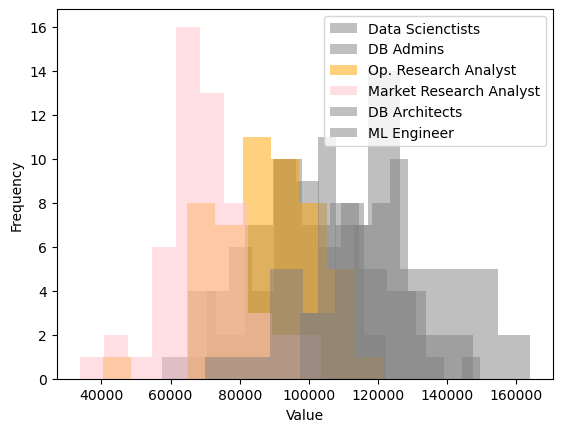

In [15]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.hist(data_sc['Salary_Mean'], alpha=0.5, label='Data Scienctists', bins=10, color = 'grey')
ax.hist(db_adm['Salary_Mean'], alpha=0.5, label='DB Admins', bins=10, color = 'grey')
ax.hist(op_rs['Salary_Mean'], alpha=0.5, label='Op. Research Analyst', bins=10, color = 'orange')
ax.hist(market_rs['Salary_Mean'], alpha=0.5, label='Market Research Analyst', bins=10, color = 'pink')
ax.hist(db_arc['Salary_Mean'], alpha=0.5, label='DB Architects', bins=10, color = 'grey')
ax.hist(ml_eng['Salary_Mean'], alpha=0.5, label='ML Engineer', bins=10, color = 'grey')


# Add labels and a legend
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('')
ax.legend()

# Save the plot
plt.savefig(r'figs\BusAna.png')

# Show the plot
plt.show()

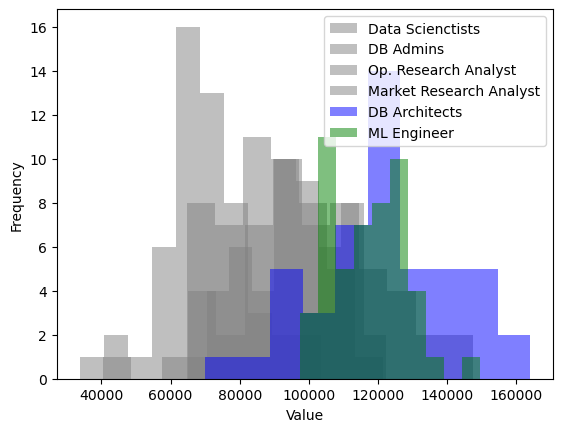

In [16]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.hist(data_sc['Salary_Mean'], alpha=0.5, label='Data Scienctists', bins=10, color = 'grey')
ax.hist(db_adm['Salary_Mean'], alpha=0.5, label='DB Admins', bins=10, color = 'grey')
ax.hist(op_rs['Salary_Mean'], alpha=0.5, label='Op. Research Analyst', bins=10, color = 'grey')
ax.hist(market_rs['Salary_Mean'], alpha=0.5, label='Market Research Analyst', bins=10, color = 'grey')
ax.hist(db_arc['Salary_Mean'], alpha=0.5, label='DB Architects', bins=10, color = 'blue')
ax.hist(ml_eng['Salary_Mean'], alpha=0.5, label='ML Engineer', bins=10, color = 'green')


# Add labels and a legend
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('')
ax.legend()

plt.savefig(r'figs\ArchEng.png')

# Show the plot
plt.show()

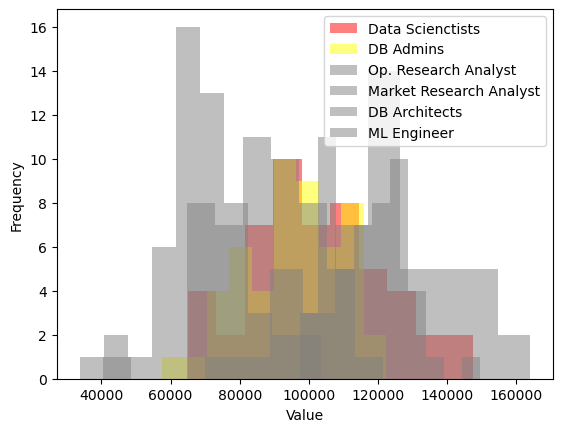

In [17]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.hist(data_sc['Salary_Mean'], alpha=0.5, label='Data Scienctists', bins=10, color = 'red')
ax.hist(db_adm['Salary_Mean'], alpha=0.5, label='DB Admins', bins=10, color = 'yellow')
ax.hist(op_rs['Salary_Mean'], alpha=0.5, label='Op. Research Analyst', bins=10, color = 'grey')
ax.hist(market_rs['Salary_Mean'], alpha=0.5, label='Market Research Analyst', bins=10, color = 'grey')
ax.hist(db_arc['Salary_Mean'], alpha=0.5, label='DB Architects', bins=10, color = 'grey')
ax.hist(ml_eng['Salary_Mean'], alpha=0.5, label='ML Engineer', bins=10, color = 'grey')


# Add labels and a legend
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('')
ax.legend()

plt.savefig(r'figs\AdSci.png')

# Show the plot
plt.show()

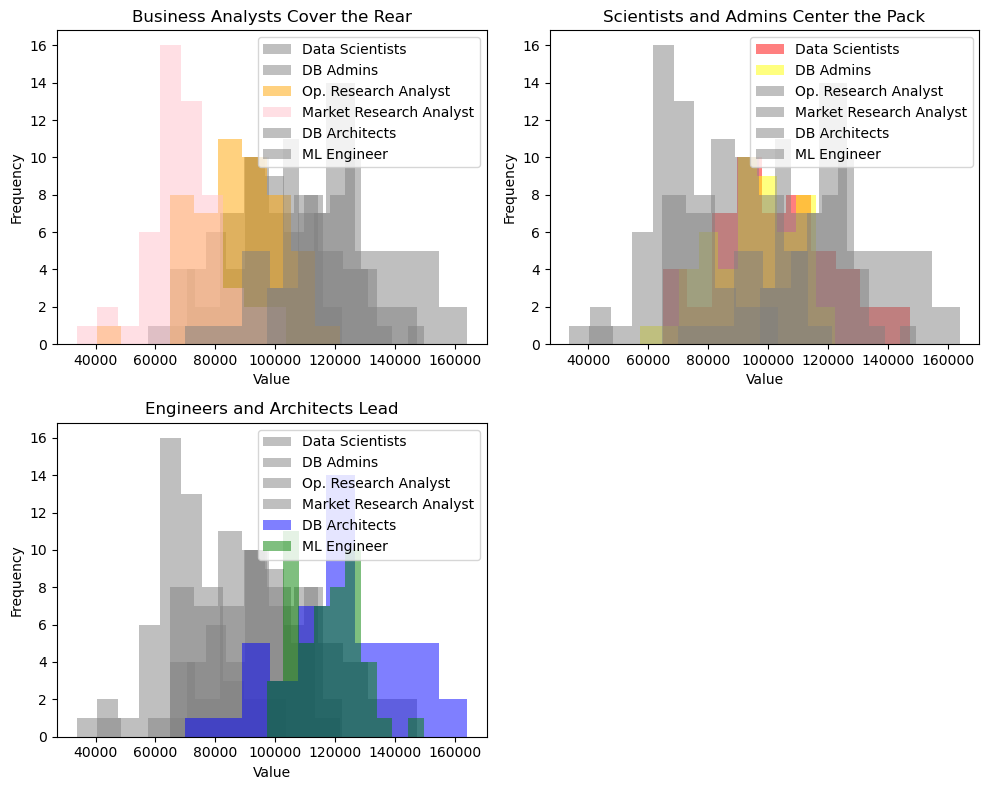

In [18]:
import matplotlib.pyplot as plt

# Create a figure with two rows and two columns for the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjust the figsize as needed

# Define data and colors for each figure
figures = [
    (data_sc, db_adm, op_rs, market_rs, db_arc, ml_eng, 'Business Analysts Cover the Rear', ['grey', 'grey', 'orange', 'pink', 'grey', 'grey']),
    (data_sc, db_adm, op_rs, market_rs, db_arc, ml_eng, 'Scientists and Admins Center the Pack', ['red', 'yellow', 'grey', 'grey', 'grey', 'grey']),
    (data_sc, db_adm, op_rs, market_rs, db_arc, ml_eng, 'Engineers and Architects Lead', ['grey', 'grey', 'grey', 'grey', 'blue', 'green'])
]

# Loop through the figures and create histograms in each subplot
for i, (data1, data2, data3, data4, data5, data6, title, colors) in enumerate(figures):
    row, col = divmod(i, 2)  # Determine the row and column for the subplot
    ax = axes[row, col]

    ax.hist(data1['Salary_Mean'], alpha=0.5, label='Data Scientists', bins=10, color=colors[0])
    ax.hist(data2['Salary_Mean'], alpha=0.5, label='DB Admins', bins=10, color=colors[1])
    ax.hist(data3['Salary_Mean'], alpha=0.5, label='Op. Research Analyst', bins=10, color=colors[2])
    ax.hist(data4['Salary_Mean'], alpha=0.5, label='Market Research Analyst', bins=10, color=colors[3])
    ax.hist(data5['Salary_Mean'], alpha=0.5, label='DB Architects', bins=10, color=colors[4])
    ax.hist(data6['Salary_Mean'], alpha=0.5, label='ML Engineer', bins=10, color=colors[5])

    # Add labels and a legend to each subplot
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.legend()

# Add an empty plot in the bottom right position to create a 2x2 grid
axes[1, 1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()
#save the plot
plt.savefig(r'figs\combined_plot.png')
# Show the combined plot with two rows and two plots on the top and one plot on the bottom
plt.show()


## Top Bot by State

In [ ]:
master=master.dropna()

In [48]:
#calculating Salary Average of States and sorting in desc order
salary_mean = master[['STAB','Salary_Mean']].groupby('STAB').mean().sort_values(by = 'Salary_Mean',ascending = False)

#adding STAB to col DF to graph geo-choropleth for option scope and location
cost_of_living['STAB'] = cost_of_living['State'].map(STAB).sort_values(ascending = False)
cost_of_living = cost_of_living[cost_of_living['State'] != 'District of Columbia']

In [49]:
salary_topbot = pd.concat([salary_mean.head(5), salary_mean.tail(5)], axis=0).reset_index()
col_topbot = pd.concat([cost_of_living.head(5), cost_of_living.tail(5)], axis=0)

In [ ]:
#Check Nulls
#master[master['STAB'] == 'WV']

In [50]:
salary_topbot

,STAB,Salary_Mean
0,WA,121571.833333
1,NY,121102.500000
2,CA,120628.666667
3,NJ,119909.833333
4,VA,119701.500000
5,MT,86816.666667
6,AR,84243.800000
7,KY,83205.000000
8,MS,82201.166667
9,LA,82083.400000


In [51]:
col_topbot

,index,State,Cost of Living Index,STAB
0,0,Hawaii,184.0,HI
1,2,Massachusetts,149.7,MA
2,3,California,137.6,CA
3,4,New York,134.5,NY
4,5,Alaska,126.6,AK
45,46,Georgia,88.6,GA
46,47,Alabama,88.1,AL
47,48,Kansas,87.5,KS
48,49,Oklahoma,85.8,OK
49,50,Mississippi,85.0,MS


In [52]:
import plotly.graph_objects as go

fig = go.Figure(   
    
data=go.Choropleth(
    locations=master['STAB'], # Spatial coordinates
    z = master['Salary_Mean'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Salary")
)

#fig.add_scattergeo(
#    locations=avg_2022['state'],
#    locationmode="USA-states", 
#    text=avg_2022['Death_Rate'],
#    mode='text',
#    textfont=dict(color='red')
#)

fig.update_layout(
    title_text = 'Salary Mean',
    geo_scope='usa', # limite map scope to USA
    font = dict(color='red',size = 10,family = 'Arial Black')
)

fig.show()



In [53]:
fig = go.Figure(data=go.Choropleth(
    locations=salary_topbot['STAB'], # Spatial coordinates
    z = salary_topbot['Salary_Mean'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Average Salary"
))

fig.add_scattergeo(
    locations=salary_topbot['STAB'],
    locationmode="USA-states", 
    mode='text',
    textfont=dict(color='red')
)

fig.update_layout(
    title_text = 'North East and West Lead in Salaries',
    geo_scope='usa', # limite map scope to USA
    font = dict(color='blue',size = 10,family = 'Arial Black')
)

#fig.write_image('salaries.png')

fig.show()



In [54]:

fig = go.Figure(data=go.Choropleth(
    locations=col_topbot['STAB'], # Spatial coordinates
    z = col_topbot['Cost of Living Index'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Cost of Living Index"
))

fig.add_scattergeo(
    locations=salary_topbot['STAB'],
    locationmode="USA-states", 
    mode='text',
    textfont=dict(color='red')
)

fig.update_layout(
    title_text = 'North East and West Lead in Cost of Living',
    geo_scope='usa', # limite map scope to USA
    font = dict(color='blue',size = 10,family = 'Arial Black')
)

#fig.write_image('col_topbot.png')

fig.show()



In [55]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=cost_of_living['STAB'], # Spatial coordinates
    z = cost_of_living['Cost of Living Index'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Cost of Living Index"
))

fig.add_scattergeo(
    locations=salary_topbot['STAB'],
    locationmode="USA-states", 
    mode='text',
    textfont=dict(color='red')
)

fig.update_layout(
    title_text = 'North East and West Lead in Cost of Living',
    geo_scope='usa', # limite map scope to USA
    font = dict(color='blue',size = 10,family = 'Arial Black')
)

fig.show()



In [27]:
col_topbot

,State,Cost of Living Index,STAB
0,Hawaii,184.0,HI
1,District of Columbia,152.2,DC
2,Massachusetts,149.7,MA
3,California,137.6,CA
4,New York,134.5,NY
46,Georgia,88.6,GA
47,Alabama,88.1,AL
48,Kansas,87.5,KS
49,Oklahoma,85.8,OK
50,Mississippi,85.0,MS


## Failed Attempts at MultiPlots

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#initialize figure with subplots

fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.5, 0.5],
    #row_heights=[0.4, 0.6],
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]
)

fig.add_trace(
    go.Choropleth(
        locations=salary_topbot['STAB'], # Spatial coordinates
        z = salary_topbot['Salary_Mean'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Viridis',
        colorbar_title = "Salary")
)

fig.add_trace(
    go.Choropleth(
        locations=col_topbot['STAB'], # Spatial coordinates
        z = col_topbot['Cost of Living Index'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Viridis',
        colorbar_title = "Salary")
)

fig.update_layout(
    title_text = 'Salary Mean',
    geo_scope='usa', # limite map scope to USA
    font = dict(color='red',size = 10,family = 'Arial Black')
)

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#initialize figure with subplots

data = []
layout = dict(
    title = 'Salary vs Cost of Living',
    geo_scope = 'usa')

fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.5, 0.5],
    #row_heights=[0.4, 0.6],
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]
)


data.append(go.Choropleth(
        locations=salary_topbot['STAB'], # Spatial coordinates
        z = salary_topbot['Salary_Mean'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Viridis',
        colorbar_title = "Salary")
           )

data.append(
    go.Choropleth(
        locations=col_topbot['STAB'], # Spatial coordinates
        z = col_topbot['Cost of Living Index'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Viridis',
        colorbar_title = "Salary")
            )

fig = go.Figure(data = data, layout = layout)

fig.show()